# Generation des graphiques pour l'algorhitme Génétique

## Sommaire

- [initialisation et import](#initialisation-et-import-necessaire)

### Pour les SAD à 100 élémets
12

13
- [variation des parametres "taille de la population" et "taux de mutation"](#100-13-pop-mut)
- [variation du nombre d'iteration](#100-13-iter)

15


### Pour les SAD à 1000 élémets

### Pour les SAD à 10000 élémets


### initialisation et import necessaire

initialisation des SAD, import des libraries et calcule de la fitness optimal par solver KNAPSACK_DIVIDE_AND_CONQUER_SOLVER de ortools.algorithms.python.knapsack_solver.

[<-- Sommaire](#sommaire)

In [1]:
import tools.parser as parser
from tools.SadObject import *
from tools.Other_solver import Other_solver
from tools.MyIterator import *
from tools.Genetique_solver import Genetique_solver,variateur_genetique
from tools.testor import *

import numpy as np
import matplotlib.pyplot as plt

sad1 = parser.loadFromFile("Data/pi-12-100-1000-001.kna")
sad2 = parser.loadFromFile("Data/pi-13-100-1000-001.kna")
sad3 = parser.loadFromFile("Data/pi-15-100-1000-001.kna")

sol_opti1,_ = Other_solver(sad1).solve()
sol_opti2,_ = Other_solver(sad2).solve()
sol_opti3,_ = Other_solver(sad3).solve()

print("les solutions optimales sont probablement :")
print("sad 1 :",sol_opti1,"pour",sad1.name)
print("sad 2 :",sol_opti2,"pour",sad2.name)
print("sad 3 :",sol_opti3,"pour",sad3.name)

load c:\Users\totod\AppData\Local\Programs\Python\Python312\Lib\site-packages\ortools\.libs\zlib1.dll...
load c:\Users\totod\AppData\Local\Programs\Python\Python312\Lib\site-packages\ortools\.libs\abseil_dll.dll...
load c:\Users\totod\AppData\Local\Programs\Python\Python312\Lib\site-packages\ortools\.libs\utf8_validity.dll...
load c:\Users\totod\AppData\Local\Programs\Python\Python312\Lib\site-packages\ortools\.libs\re2.dll...
load c:\Users\totod\AppData\Local\Programs\Python\Python312\Lib\site-packages\ortools\.libs\libprotobuf.dll...
load c:\Users\totod\AppData\Local\Programs\Python\Python312\Lib\site-packages\ortools\.libs\highs.dll...
load c:\Users\totod\AppData\Local\Programs\Python\Python312\Lib\site-packages\ortools\.libs\ortools.dll...


loading file: 100%|██████████| 100/100 [00:00<?, ?lines/s] 

les solutions optimales sont probablement :
sad 1 : 970 pour pi-12-100-1000-001.kna
sad 2 : 1989 pour pi-13-100-1000-001.kna
sad 3 : 1011 pour pi-15-100-1000-001.kna


### 100-13-pop-mut
variation des parametres "taille de la population" et "taux de mutation"

[0.0005, 0.00075, 0.001, 0.00125, 0.0015, 0.00175, 0.002, 0.00225, 0.0025, 0.00275, 0.003, 0.00325, 0.0035, 0.00375, 0.004, 0.00425, 0.0045, 0.00475, 0.005, 0.00525, 0.0055, 0.00575, 0.006, 0.00625, 0.0065, 0.00675, 0.007, 0.00725, 0.0075, 0.00775, 0.008, 0.00825, 0.0085, 0.00875]


calcul: 100%|██████████| 25/25 [00:05<00:00,  4.52batch/s]


matrix =  [[1692.6, 1731.6, 1829.1, 1819.35, 1807.65, 1858.35, 1877.85, 1905.15, 1891.5, 1934.4, 1946.1, 1959.75, 1942.2, 1920.75, 1967.55, 1953.9, 1975.35, 1979.25, 1985.1, 1955.85, 1973.4, 1985.1, 1975.35, 1989.0, 1959.75], [1708.2, 1766.7, 1821.3, 1850.55, 1862.25, 1889.55, 1934.4, 1924.65, 1905.15, 1953.9, 1961.7, 1950.0, 1977.3, 1951.95, 1934.4, 1979.25, 1944.15, 1989.0, 1985.1, 1983.15, 1948.05, 1981.2, 1987.05, 1989.0, 1979.25], [1700.4, 1770.6, 1827.15, 1932.45, 1905.15, 1928.55, 1872.0, 1907.1, 1975.35, 1969.5, 1940.25, 1932.45, 1955.85, 1959.75, 1973.4, 1989.0, 1989.0, 1979.25, 1987.05, 1977.3, 1987.05, 1981.2, 1973.4, 1981.2, 1987.05], [1782.3, 1813.5, 1809.6, 1916.85, 1873.95, 1950.0, 1924.65, 1922.7, 1936.35, 1969.5, 1981.2, 1948.05, 1965.6, 1983.15, 1969.5, 1965.6, 1985.1, 1987.05, 1985.1, 1983.15, 1985.1, 1985.1, 1983.15, 1987.05, 1981.2], [1809.6, 1794.0, 1827.15, 1907.1, 1873.95, 1944.15, 1911.0, 1955.85, 1932.45, 1969.5, 1989.0, 1963.65, 1965.6, 1969.5, 1983.15, 1973.

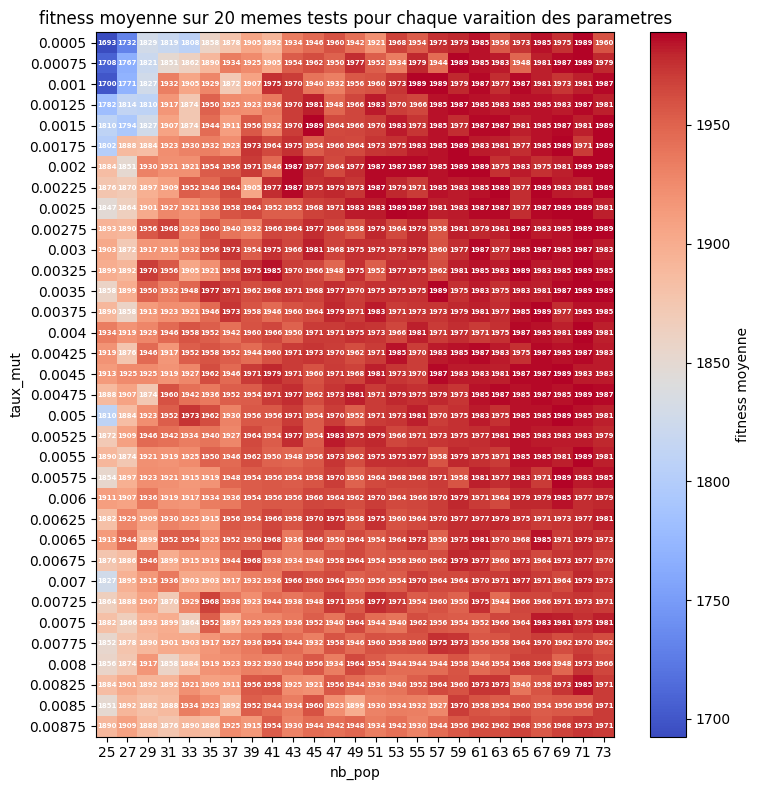

In [ ]:
nb_iter = 40
group_size = 20 #nombre de tests de chaque paramètres dans une éxecutions.

(variateur,_) = variateur_genetique.nombre_population()
iterator1 = np.arange(25,75,2)
title = ""
avg = []

iterator2 = np.arange(0.0005,0.009,0.00025)
iterator2 = [round(x, 5) for x in iterator2]

print(list(iterator2))
for mutation_rate in iterator2:
    test = Testor(Genetique_solver(sad2,nb_iter,0,mutation_rate,1,"classic"))
    testResult = test.test(iterator1,variateur,group_size)
    means = testResult[3]
    avg.append(means)

title1 = "nb_pop"
title2 = "taux_mut"

plot_full_colored_matrix(avg,iterator1,iterator2,title1,title2,title)

calcul: 100%|██████████| 25/25 [00:07<00:00,  3.56batch/s]


matrix =  [[1719.9, 1737.45, 1838.85, 1868.1, 1836.9, 1856.4, 1848.6, 1918.8, 1942.2, 1916.85, 1936.35, 1928.55, 1940.25, 1938.3, 1955.85, 1959.75, 1971.45, 1953.9, 1971.45, 1975.35, 1967.55, 1981.2, 1969.5, 1965.6, 1969.5], [1731.6, 1753.05, 1842.75, 1877.85, 1899.3, 1858.35, 1901.25, 1934.4, 1916.85, 1936.35, 1897.35, 1959.75, 1930.5, 1928.55, 1963.65, 1942.2, 1957.8, 1981.2, 1975.35, 1963.65, 1961.7, 1977.3, 1985.1, 1983.15, 1985.1], [1795.95, 1756.95, 1776.45, 1864.2, 1938.3, 1883.7, 1940.25, 1942.2, 1959.75, 1948.05, 1948.05, 1907.1, 1946.1, 1948.05, 1938.3, 1973.4, 1944.15, 1977.3, 1983.15, 1969.5, 1973.4, 1979.25, 1981.2, 1987.05, 1983.15], [1760.85, 1817.4, 1905.15, 1905.15, 1893.45, 1860.3, 1926.6, 1866.15, 1955.85, 1950.0, 1955.85, 1963.65, 1973.4, 1959.75, 1967.55, 1963.65, 1977.3, 1985.1, 1948.05, 1981.2, 1971.45, 1963.65, 1989.0, 1989.0, 1973.4], [1788.15, 1821.3, 1905.15, 1889.55, 1909.05, 1864.2, 1948.05, 1938.3, 1948.05, 1955.85, 1948.05, 1948.05, 1967.55, 1977.3, 1983.

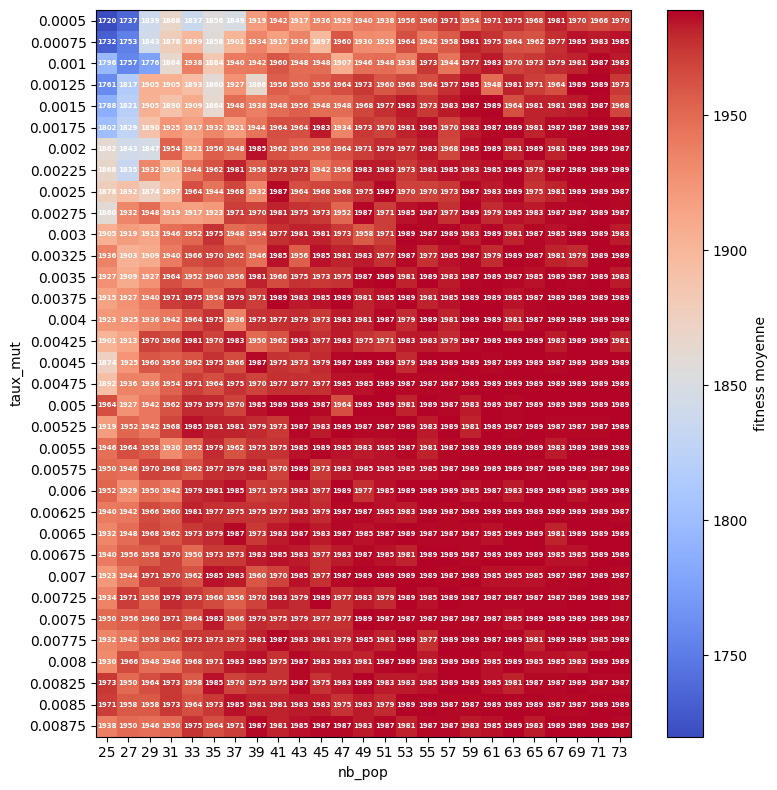

In [ ]:
nb_iter = 40
group_size = 20 #nombre de tests de chaque paramètres dans une éxecutions.

(variateur,_) = variateur_genetique.nombre_population()
iterator1 = np.arange(25,75,2)
title = ""
avg = []

iterator2 = np.arange(0.0005,0.009,0.00025)
iterator2 = [round(x, 5) for x in iterator2]

for mutation_rate in iterator2:
    test = Testor(Genetique_solver(sad2,nb_iter,0,mutation_rate,1,"new_mutation"))
    testResult = test.test(iterator1,variateur,group_size)
    means = testResult[3]
    avg.append(means)

title1 = "nb_pop"
title2 = "taux_mut"

plot_full_colored_matrix(avg,iterator1,iterator2,title1,title2,title)

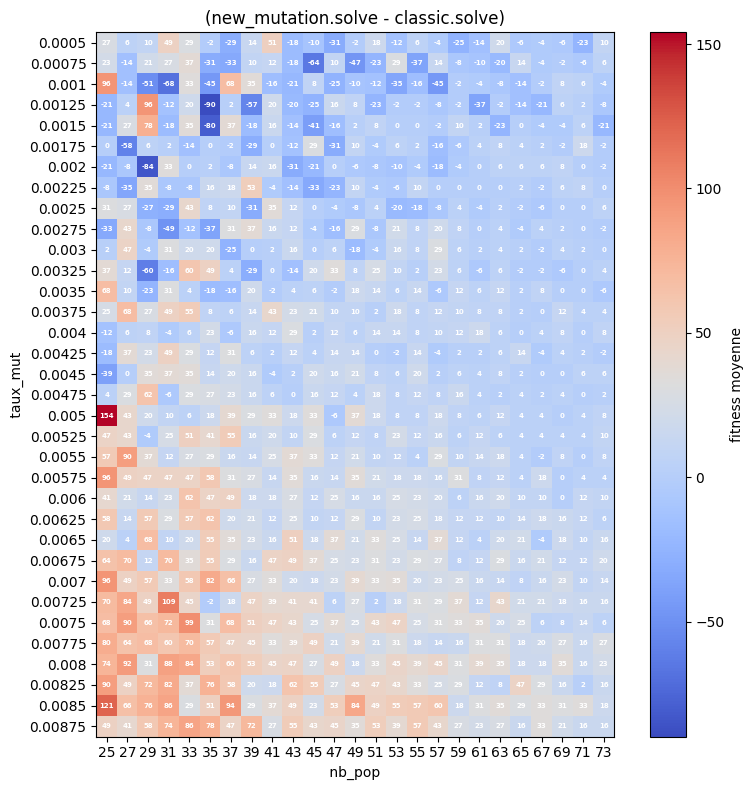

In [ ]:
matrix_1 =  [[1692.6, 1731.6, 1829.1, 1819.35, 1807.65, 1858.35, 1877.85, 1905.15, 1891.5, 1934.4, 1946.1, 1959.75, 1942.2, 1920.75, 1967.55, 1953.9, 1975.35, 1979.25, 1985.1, 1955.85, 1973.4, 1985.1, 1975.35, 1989.0, 1959.75], [1708.2, 1766.7, 1821.3, 1850.55, 1862.25, 1889.55, 1934.4, 1924.65, 1905.15, 1953.9, 1961.7, 1950.0, 1977.3, 1951.95, 1934.4, 1979.25, 1944.15, 1989.0, 1985.1, 1983.15, 1948.05, 1981.2, 1987.05, 1989.0, 1979.25], [1700.4, 1770.6, 1827.15, 1932.45, 1905.15, 1928.55, 1872.0, 1907.1, 1975.35, 1969.5, 1940.25, 1932.45, 1955.85, 1959.75, 1973.4, 1989.0, 1989.0, 1979.25, 1987.05, 1977.3, 1987.05, 1981.2, 1973.4, 1981.2, 1987.05], [1782.3, 1813.5, 1809.6, 1916.85, 1873.95, 1950.0, 1924.65, 1922.7, 1936.35, 1969.5, 1981.2, 1948.05, 1965.6, 1983.15, 1969.5, 1965.6, 1985.1, 1987.05, 1985.1, 1983.15, 1985.1, 1985.1, 1983.15, 1987.05, 1981.2], [1809.6, 1794.0, 1827.15, 1907.1, 1873.95, 1944.15, 1911.0, 1955.85, 1932.45, 1969.5, 1989.0, 1963.65, 1965.6, 1969.5, 1983.15, 1973.4, 1985.1, 1977.3, 1987.05, 1987.05, 1981.2, 1985.1, 1987.05, 1981.2, 1989.0], [1801.8, 1887.6, 1883.7, 1922.7, 1930.5, 1932.45, 1922.7, 1973.4, 1963.65, 1975.35, 1953.9, 1965.6, 1963.65, 1973.4, 1975.35, 1983.15, 1985.1, 1989.0, 1983.15, 1981.2, 1977.3, 1985.1, 1989.0, 1971.45, 1989.0], [1883.7, 1850.55, 1930.5, 1920.75, 1920.75, 1953.9, 1955.85, 1971.45, 1946.1, 1987.05, 1977.3, 1963.65, 1977.3, 1987.05, 1987.05, 1987.05, 1985.1, 1989.0, 1989.0, 1975.35, 1983.15, 1975.35, 1981.2, 1989.0, 1989.0], [1875.9, 1870.05, 1897.35, 1909.05, 1951.95, 1946.1, 1963.65, 1905.15, 1977.3, 1987.05, 1975.35, 1979.25, 1973.4, 1987.05, 1979.25, 1971.45, 1985.1, 1983.15, 1985.1, 1989.0, 1977.3, 1989.0, 1983.15, 1981.2, 1989.0], [1846.65, 1864.2, 1901.25, 1926.6, 1920.75, 1936.35, 1957.8, 1963.65, 1951.95, 1951.95, 1967.55, 1971.45, 1983.15, 1983.15, 1989.0, 1987.05, 1981.2, 1983.15, 1987.05, 1987.05, 1977.3, 1987.05, 1989.0, 1989.0, 1981.2], [1893.45, 1889.55, 1955.85, 1967.55, 1928.55, 1959.75, 1940.25, 1932.45, 1965.6, 1963.65, 1977.3, 1967.55, 1957.8, 1979.25, 1963.65, 1979.25, 1957.8, 1981.2, 1979.25, 1981.2, 1987.05, 1983.15, 1985.1, 1989.0, 1989.0], [1903.2, 1872.0, 1916.85, 1914.9, 1932.45, 1955.85, 1973.4, 1953.9, 1975.35, 1965.6, 1981.2, 1967.55, 1975.35, 1975.35, 1973.4, 1979.25, 1959.75, 1977.3, 1987.05, 1977.3, 1985.1, 1987.05, 1985.1, 1987.05, 1983.15], [1899.3, 1891.5, 1969.5, 1955.85, 1905.15, 1920.75, 1957.8, 1975.35, 1985.1, 1969.5, 1965.6, 1948.05, 1975.35, 1951.95, 1977.3, 1975.35, 1961.7, 1981.2, 1985.1, 1983.15, 1989.0, 1983.15, 1985.1, 1989.0, 1985.1], [1858.35, 1899.3, 1950.0, 1932.45, 1948.05, 1977.3, 1971.45, 1961.7, 1967.55, 1971.45, 1967.55, 1977.3, 1969.5, 1975.35, 1975.35, 1975.35, 1989.0, 1975.35, 1983.15, 1975.35, 1983.15, 1981.2, 1987.05, 1989.0, 1989.0], [1889.55, 1858.35, 1912.95, 1922.7, 1920.75, 1946.1, 1973.4, 1957.8, 1946.1, 1959.75, 1963.65, 1979.25, 1971.45, 1983.15, 1971.45, 1973.4, 1973.4, 1979.25, 1981.2, 1977.3, 1985.1, 1989.0, 1977.3, 1985.1, 1985.1], [1934.4, 1918.8, 1928.55, 1946.1, 1957.8, 1951.95, 1942.2, 1959.75, 1965.6, 1950.0, 1971.45, 1971.45, 1975.35, 1973.4, 1965.6, 1981.2, 1971.45, 1977.3, 1971.45, 1975.35, 1987.05, 1985.1, 1981.2, 1989.0, 1981.2], [1918.8, 1875.9, 1946.1, 1916.85, 1951.95, 1957.8, 1951.95, 1944.15, 1959.75, 1971.45, 1973.4, 1969.5, 1961.7, 1971.45, 1985.1, 1969.5, 1983.15, 1985.1, 1987.05, 1983.15, 1975.35, 1987.05, 1985.1, 1987.05, 1983.15], [1912.95, 1924.65, 1924.65, 1918.8, 1926.6, 1961.7, 1946.1, 1971.45, 1979.25, 1971.45, 1959.75, 1971.45, 1967.55, 1981.2, 1973.4, 1969.5, 1987.05, 1983.15, 1983.15, 1981.2, 1987.05, 1987.05, 1989.0, 1983.15, 1983.15], [1887.6, 1907.1, 1873.95, 1959.75, 1942.2, 1936.35, 1951.95, 1953.9, 1971.45, 1977.3, 1961.7, 1973.4, 1981.2, 1971.45, 1979.25, 1975.35, 1979.25, 1973.4, 1985.1, 1987.05, 1985.1, 1987.05, 1985.1, 1989.0, 1987.05], [1809.6, 1883.7, 1922.7, 1951.95, 1973.4, 1961.7, 1930.5, 1955.85, 1955.85, 1971.45, 1953.9, 1969.5, 1951.95, 1971.45, 1973.4, 1981.2, 1969.5, 1975.35, 1983.15, 1975.35, 1985.1, 1985.1, 1989.0, 1985.1, 1981.2], [1872.0, 1909.05, 1946.1, 1942.2, 1934.4, 1940.25, 1926.6, 1963.65, 1953.9, 1977.3, 1953.9, 1983.15, 1975.35, 1979.25, 1965.6, 1971.45, 1973.4, 1975.35, 1977.3, 1981.2, 1985.1, 1983.15, 1983.15, 1983.15, 1979.25], [1889.55, 1873.95, 1920.75, 1918.8, 1924.65, 1950.0, 1946.1, 1961.7, 1950.0, 1948.05, 1955.85, 1973.4, 1961.7, 1975.35, 1975.35, 1977.3, 1957.8, 1979.25, 1975.35, 1971.45, 1985.1, 1985.1, 1981.2, 1989.0, 1981.2], [1854.45, 1897.35, 1922.7, 1920.75, 1914.9, 1918.8, 1948.05, 1953.9, 1955.85, 1953.9, 1957.8, 1969.5, 1950.0, 1963.65, 1967.55, 1967.55, 1971.45, 1957.8, 1981.2, 1977.3, 1983.15, 1971.45, 1989.0, 1983.15, 1985.1], [1911.0, 1907.1, 1936.35, 1918.8, 1916.85, 1934.4, 1936.35, 1953.9, 1955.85, 1955.85, 1965.6, 1963.65, 1961.7, 1969.5, 1963.65, 1965.6, 1969.5, 1979.25, 1971.45, 1963.65, 1979.25, 1979.25, 1985.1, 1977.3, 1979.25], [1881.75, 1928.55, 1909.05, 1930.5, 1924.65, 1914.9, 1955.85, 1953.9, 1965.6, 1957.8, 1969.5, 1975.35, 1957.8, 1975.35, 1959.75, 1963.65, 1969.5, 1977.3, 1977.3, 1979.25, 1975.35, 1971.45, 1973.4, 1977.3, 1981.2], [1912.95, 1944.15, 1899.3, 1951.95, 1953.9, 1924.65, 1951.95, 1950.0, 1967.55, 1936.35, 1965.6, 1950.0, 1963.65, 1953.9, 1963.65, 1973.4, 1950.0, 1975.35, 1981.2, 1969.5, 1967.55, 1985.1, 1971.45, 1979.25, 1973.4], [1875.9, 1885.65, 1946.1, 1899.3, 1914.9, 1918.8, 1944.15, 1967.55, 1938.3, 1934.4, 1940.25, 1957.8, 1963.65, 1953.9, 1957.8, 1959.75, 1961.7, 1979.25, 1977.3, 1959.75, 1973.4, 1963.65, 1973.4, 1977.3, 1969.5], [1827.15, 1895.4, 1914.9, 1936.35, 1903.2, 1903.2, 1916.85, 1932.45, 1936.35, 1965.6, 1959.75, 1963.65, 1950.0, 1955.85, 1953.9, 1969.5, 1963.65, 1963.65, 1969.5, 1971.45, 1977.3, 1971.45, 1963.65, 1979.25, 1973.4], [1864.2, 1887.6, 1907.1, 1870.05, 1928.55, 1967.55, 1938.3, 1922.7, 1944.15, 1938.3, 1948.05, 1971.45, 1955.85, 1977.3, 1971.45, 1953.9, 1959.75, 1950.0, 1975.35, 1944.15, 1965.6, 1965.6, 1971.45, 1973.4, 1971.45], [1881.75, 1866.15, 1893.45, 1899.3, 1864.2, 1951.95, 1897.35, 1928.55, 1928.55, 1936.35, 1951.95, 1940.25, 1963.65, 1944.15, 1940.25, 1961.7, 1955.85, 1953.9, 1951.95, 1965.6, 1963.65, 1983.15, 1981.2, 1975.35, 1981.2], [1852.5, 1877.85, 1889.55, 1901.25, 1903.2, 1916.85, 1926.6, 1936.35, 1953.9, 1944.15, 1932.45, 1957.8, 1946.1, 1959.75, 1957.8, 1959.75, 1975.35, 1973.4, 1955.85, 1957.8, 1963.65, 1969.5, 1961.7, 1969.5, 1961.7], [1856.4, 1873.95, 1916.85, 1858.35, 1883.7, 1918.8, 1922.7, 1932.45, 1930.5, 1940.25, 1955.85, 1934.4, 1963.65, 1953.9, 1944.15, 1944.15, 1944.15, 1957.8, 1946.1, 1953.9, 1967.55, 1967.55, 1948.05, 1973.4, 1965.6], [1883.7, 1901.25, 1891.5, 1891.5, 1920.75, 1909.05, 1911.0, 1955.85, 1957.8, 1924.65, 1920.75, 1955.85, 1944.15, 1936.35, 1940.25, 1951.95, 1963.65, 1959.75, 1973.4, 1973.4, 1940.25, 1957.8, 1973.4, 1985.1, 1971.45], [1850.55, 1891.5, 1881.75, 1887.6, 1934.4, 1922.7, 1891.5, 1951.95, 1944.15, 1934.4, 1959.75, 1922.7, 1899.3, 1930.5, 1934.4, 1932.45, 1926.6, 1969.5, 1957.8, 1953.9, 1959.75, 1953.9, 1955.85, 1955.85, 1971.45], [1889.55, 1909.05, 1887.6, 1875.9, 1889.55, 1885.65, 1924.65, 1914.9, 1953.9, 1930.5, 1944.15, 1942.2, 1948.05, 1934.4, 1942.2, 1930.5, 1944.15, 1955.85, 1961.7, 1961.7, 1967.55, 1955.85, 1967.55, 1973.4, 1971.45]]
x_ticks_1 =  [25, 27, 29, 31, 33, 35, 37, 39, 41, 43, 45, 47, 49, 51, 53, 55, 57, 59, 61, 63, 65, 67, 69, 71, 73]
y_ticks_1 =  [0.0005, 0.00075, 0.001, 0.00125, 0.0015, 0.00175, 0.002, 0.00225, 0.0025, 0.00275, 0.003, 0.00325, 0.0035, 0.00375, 0.004, 0.00425, 0.0045, 0.00475, 0.005, 0.00525, 0.0055, 0.00575, 0.006, 0.00625, 0.0065, 0.00675, 0.007, 0.00725, 0.0075, 0.00775, 0.008, 0.00825, 0.0085, 0.00875]
title1_1 = " nb_pop "
title2_1 = " taux_mut "
title_1 = "  "

matrix_2 =  [[1719.9, 1737.45, 1838.85, 1868.1, 1836.9, 1856.4, 1848.6, 1918.8, 1942.2, 1916.85, 1936.35, 1928.55, 1940.25, 1938.3, 1955.85, 1959.75, 1971.45, 1953.9, 1971.45, 1975.35, 1967.55, 1981.2, 1969.5, 1965.6, 1969.5], [1731.6, 1753.05, 1842.75, 1877.85, 1899.3, 1858.35, 1901.25, 1934.4, 1916.85, 1936.35, 1897.35, 1959.75, 1930.5, 1928.55, 1963.65, 1942.2, 1957.8, 1981.2, 1975.35, 1963.65, 1961.7, 1977.3, 1985.1, 1983.15, 1985.1], [1795.95, 1756.95, 1776.45, 1864.2, 1938.3, 1883.7, 1940.25, 1942.2, 1959.75, 1948.05, 1948.05, 1907.1, 1946.1, 1948.05, 1938.3, 1973.4, 1944.15, 1977.3, 1983.15, 1969.5, 1973.4, 1979.25, 1981.2, 1987.05, 1983.15], [1760.85, 1817.4, 1905.15, 1905.15, 1893.45, 1860.3, 1926.6, 1866.15, 1955.85, 1950.0, 1955.85, 1963.65, 1973.4, 1959.75, 1967.55, 1963.65, 1977.3, 1985.1, 1948.05, 1981.2, 1971.45, 1963.65, 1989.0, 1989.0, 1973.4], [1788.15, 1821.3, 1905.15, 1889.55, 1909.05, 1864.2, 1948.05, 1938.3, 1948.05, 1955.85, 1948.05, 1948.05, 1967.55, 1977.3, 1983.15, 1973.4, 1983.15, 1987.05, 1989.0, 1963.65, 1981.2, 1981.2, 1983.15, 1987.05, 1967.55], [1801.8, 1829.1, 1889.55, 1924.65, 1916.85, 1932.45, 1920.75, 1944.15, 1963.65, 1963.65, 1983.15, 1934.4, 1973.4, 1969.5, 1981.2, 1985.1, 1969.5, 1983.15, 1987.05, 1989.0, 1981.2, 1987.05, 1987.05, 1989.0, 1987.05], [1862.25, 1842.75, 1846.65, 1953.9, 1920.75, 1955.85, 1948.05, 1985.1, 1961.7, 1955.85, 1955.85, 1963.65, 1971.45, 1979.25, 1977.3, 1983.15, 1967.55, 1985.1, 1989.0, 1981.2, 1989.0, 1981.2, 1989.0, 1989.0, 1987.05], [1868.1, 1834.95, 1932.45, 1901.25, 1944.15, 1961.7, 1981.2, 1957.8, 1973.4, 1973.4, 1942.2, 1955.85, 1983.15, 1983.15, 1973.4, 1981.2, 1985.1, 1983.15, 1985.1, 1989.0, 1979.25, 1987.05, 1989.0, 1989.0, 1989.0], [1877.85, 1891.5, 1873.95, 1897.35, 1963.65, 1944.15, 1967.55, 1932.45, 1987.05, 1963.65, 1967.55, 1967.55, 1975.35, 1987.05, 1969.5, 1969.5, 1973.4, 1987.05, 1983.15, 1989.0, 1975.35, 1981.2, 1989.0, 1989.0, 1987.05], [1860.3, 1932.45, 1948.05, 1918.8, 1916.85, 1922.7, 1971.45, 1969.5, 1981.2, 1975.35, 1973.4, 1951.95, 1987.05, 1971.45, 1985.1, 1987.05, 1977.3, 1989.0, 1979.25, 1985.1, 1983.15, 1987.05, 1987.05, 1989.0, 1987.05], [1905.15, 1918.8, 1912.95, 1946.1, 1951.95, 1975.35, 1948.05, 1953.9, 1977.3, 1981.2, 1981.2, 1973.4, 1957.8, 1971.45, 1989.0, 1987.05, 1989.0, 1983.15, 1989.0, 1981.2, 1987.05, 1985.1, 1989.0, 1989.0, 1983.15], [1936.35, 1903.2, 1909.05, 1940.25, 1965.6, 1969.5, 1961.7, 1946.1, 1985.1, 1955.85, 1985.1, 1981.2, 1983.15, 1977.3, 1987.05, 1977.3, 1985.1, 1987.05, 1979.25, 1989.0, 1987.05, 1981.2, 1979.25, 1989.0, 1989.0], [1926.6, 1909.05, 1926.6, 1963.65, 1951.95, 1959.75, 1955.85, 1981.2, 1965.6, 1975.35, 1973.4, 1975.35, 1987.05, 1989.0, 1981.2, 1989.0, 1983.15, 1987.05, 1989.0, 1987.05, 1985.1, 1989.0, 1987.05, 1989.0, 1983.15], [1914.9, 1926.6, 1940.25, 1971.45, 1975.35, 1953.9, 1979.25, 1971.45, 1989.0, 1983.15, 1985.1, 1989.0, 1981.2, 1985.1, 1989.0, 1981.2, 1985.1, 1989.0, 1989.0, 1985.1, 1987.05, 1989.0, 1989.0, 1989.0, 1989.0], [1922.7, 1924.65, 1936.35, 1942.2, 1963.65, 1975.35, 1936.35, 1975.35, 1977.3, 1979.25, 1973.4, 1983.15, 1981.2, 1987.05, 1979.25, 1989.0, 1981.2, 1989.0, 1989.0, 1981.2, 1987.05, 1989.0, 1989.0, 1989.0, 1989.0], [1901.25, 1912.95, 1969.5, 1965.6, 1981.2, 1969.5, 1983.15, 1950.0, 1961.7, 1983.15, 1977.3, 1983.15, 1975.35, 1971.45, 1983.15, 1983.15, 1979.25, 1987.05, 1989.0, 1989.0, 1989.0, 1983.15, 1989.0, 1989.0, 1981.2], [1873.95, 1924.65, 1959.75, 1955.85, 1961.7, 1975.35, 1965.6, 1987.05, 1975.35, 1973.4, 1979.25, 1987.05, 1989.0, 1989.0, 1979.25, 1989.0, 1989.0, 1989.0, 1987.05, 1989.0, 1989.0, 1987.05, 1989.0, 1989.0, 1989.0], [1891.5, 1936.35, 1936.35, 1953.9, 1971.45, 1963.65, 1975.35, 1969.5, 1977.3, 1977.3, 1977.3, 1985.1, 1985.1, 1989.0, 1987.05, 1987.05, 1987.05, 1989.0, 1989.0, 1989.0, 1989.0, 1989.0, 1989.0, 1989.0, 1989.0], [1963.65, 1926.6, 1942.2, 1961.7, 1979.25, 1979.25, 1969.5, 1985.1, 1989.0, 1989.0, 1987.05, 1963.65, 1989.0, 1989.0, 1981.2, 1989.0, 1987.05, 1983.15, 1989.0, 1987.05, 1989.0, 1989.0, 1989.0, 1989.0, 1989.0], [1918.8, 1951.95, 1942.2, 1967.55, 1985.1, 1981.2, 1981.2, 1979.25, 1973.4, 1987.05, 1983.15, 1989.0, 1987.05, 1987.05, 1989.0, 1983.15, 1989.0, 1981.2, 1989.0, 1987.05, 1989.0, 1987.05, 1987.05, 1987.05, 1989.0], [1946.1, 1963.65, 1957.8, 1930.5, 1951.95, 1979.25, 1961.7, 1975.35, 1975.35, 1985.1, 1989.0, 1985.1, 1983.15, 1985.1, 1987.05, 1981.2, 1987.05, 1989.0, 1989.0, 1989.0, 1989.0, 1983.15, 1989.0, 1989.0, 1989.0], [1950.0, 1946.1, 1969.5, 1967.55, 1961.7, 1977.3, 1979.25, 1981.2, 1969.5, 1989.0, 1973.4, 1983.15, 1985.1, 1985.1, 1985.1, 1985.1, 1987.05, 1989.0, 1989.0, 1989.0, 1987.05, 1989.0, 1989.0, 1987.05, 1989.0], [1951.95, 1928.55, 1950.0, 1942.2, 1979.25, 1981.2, 1985.1, 1971.45, 1973.4, 1983.15, 1977.3, 1989.0, 1977.3, 1985.1, 1989.0, 1989.0, 1989.0, 1985.1, 1987.05, 1983.15, 1989.0, 1989.0, 1985.1, 1989.0, 1989.0], [1940.25, 1942.2, 1965.6, 1959.75, 1981.2, 1977.3, 1975.35, 1975.35, 1977.3, 1983.15, 1979.25, 1987.05, 1987.05, 1985.1, 1983.15, 1989.0, 1987.05, 1989.0, 1989.0, 1989.0, 1989.0, 1989.0, 1989.0, 1989.0, 1987.05], [1932.45, 1948.05, 1967.55, 1961.7, 1973.4, 1979.25, 1987.05, 1973.4, 1983.15, 1987.05, 1983.15, 1987.05, 1985.1, 1987.05, 1989.0, 1987.05, 1987.05, 1987.05, 1985.1, 1989.0, 1989.0, 1981.2, 1989.0, 1989.0, 1989.0], [1940.25, 1955.85, 1957.8, 1969.5, 1950.0, 1973.4, 1973.4, 1983.15, 1985.1, 1983.15, 1977.3, 1983.15, 1987.05, 1985.1, 1981.2, 1989.0, 1989.0, 1987.05, 1989.0, 1989.0, 1989.0, 1985.1, 1985.1, 1989.0, 1989.0], [1922.7, 1944.15, 1971.45, 1969.5, 1961.7, 1985.1, 1983.15, 1959.75, 1969.5, 1985.1, 1977.3, 1987.05, 1989.0, 1989.0, 1989.0, 1989.0, 1987.05, 1989.0, 1985.1, 1985.1, 1985.1, 1987.05, 1987.05, 1989.0, 1987.05], [1934.4, 1971.45, 1955.85, 1979.25, 1973.4, 1965.6, 1955.85, 1969.5, 1983.15, 1979.25, 1989.0, 1977.3, 1983.15, 1979.25, 1989.0, 1985.1, 1989.0, 1987.05, 1987.05, 1987.05, 1987.05, 1987.05, 1989.0, 1989.0, 1987.05], [1950.0, 1955.85, 1959.75, 1971.45, 1963.65, 1983.15, 1965.6, 1979.25, 1975.35, 1979.25, 1977.3, 1977.3, 1989.0, 1987.05, 1987.05, 1987.05, 1987.05, 1987.05, 1987.05, 1985.1, 1989.0, 1989.0, 1989.0, 1989.0, 1987.05], [1932.45, 1942.2, 1957.8, 1961.7, 1973.4, 1973.4, 1973.4, 1981.2, 1987.05, 1983.15, 1981.2, 1979.25, 1985.1, 1981.2, 1989.0, 1977.3, 1989.0, 1989.0, 1987.05, 1989.0, 1981.2, 1989.0, 1989.0, 1985.1, 1989.0], [1930.5, 1965.6, 1948.05, 1946.1, 1967.55, 1971.45, 1983.15, 1985.1, 1975.35, 1987.05, 1983.15, 1983.15, 1981.2, 1987.05, 1989.0, 1983.15, 1989.0, 1989.0, 1985.1, 1989.0, 1985.1, 1985.1, 1983.15, 1989.0, 1989.0], [1973.4, 1950.0, 1963.65, 1973.4, 1957.8, 1985.1, 1969.5, 1975.35, 1975.35, 1987.05, 1975.35, 1983.15, 1989.0, 1983.15, 1983.15, 1985.1, 1989.0, 1989.0, 1985.1, 1981.2, 1987.05, 1987.05, 1989.0, 1987.05, 1987.05], [1971.45, 1957.8, 1957.8, 1973.4, 1963.65, 1973.4, 1985.1, 1981.2, 1981.2, 1983.15, 1983.15, 1975.35, 1983.15, 1979.25, 1989.0, 1989.0, 1987.05, 1987.05, 1989.0, 1989.0, 1989.0, 1987.05, 1987.05, 1989.0, 1989.0], [1938.3, 1950.0, 1946.1, 1950.0, 1975.35, 1963.65, 1971.45, 1987.05, 1981.2, 1985.1, 1987.05, 1987.05, 1983.15, 1987.05, 1981.2, 1987.05, 1987.05, 1983.15, 1985.1, 1989.0, 1983.15, 1989.0, 1989.0, 1989.0, 1987.05]]
x_ticks_2 =  [25, 27, 29, 31, 33, 35, 37, 39, 41, 43, 45, 47, 49, 51, 53, 55, 57, 59, 61, 63, 65, 67, 69, 71, 73]
y_ticks_2 =  [0.0005, 0.00075, 0.001, 0.00125, 0.0015, 0.00175, 0.002, 0.00225, 0.0025, 0.00275, 0.003, 0.00325, 0.0035, 0.00375, 0.004, 0.00425, 0.0045, 0.00475, 0.005, 0.00525, 0.0055, 0.00575, 0.006, 0.00625, 0.0065, 0.00675, 0.007, 0.00725, 0.0075, 0.00775, 0.008, 0.00825, 0.0085, 0.00875]
title1_2 = " nb_pop "
title2_2 = " taux_mut "
title_2 = "  "


title = "(new_mutation.solve - classic.solve)"

matrix_1 = np.array(matrix_1)
matrix_2 = np.array(matrix_2)
matrix_3 = matrix_2 - matrix_1

plot_full_colored_matrix(matrix_3,x_ticks_1,y_ticks_1,title1_1,title2_1,title,print_data = False)

calcul: 100%|██████████| 19/19 [00:05<00:00,  3.39batch/s]


matrix =  [[1719.9, 1795.95, 1788.15, 1862.25, 1877.85, 1905.15, 1926.6, 1922.7, 1873.95, 1963.65, 1946.1, 1951.95, 1932.45, 1922.7, 1950.0, 1930.5, 1971.45, 1936.35, 1959.75], [1737.45, 1756.95, 1821.3, 1842.75, 1891.5, 1918.8, 1909.05, 1924.65, 1924.65, 1926.6, 1963.65, 1928.55, 1948.05, 1944.15, 1955.85, 1965.6, 1957.8, 1946.1, 1977.3], [1838.85, 1776.45, 1905.15, 1846.65, 1873.95, 1912.95, 1926.6, 1936.35, 1959.75, 1942.2, 1957.8, 1950.0, 1971.45, 1967.55, 1959.75, 1948.05, 1957.8, 1965.6, 1918.8], [1868.1, 1864.2, 1889.55, 1953.9, 1897.35, 1946.1, 1963.65, 1942.2, 1955.85, 1961.7, 1930.5, 1942.2, 1961.7, 1969.5, 1971.45, 1946.1, 1973.4, 1975.35, 1967.55], [1836.9, 1938.3, 1909.05, 1920.75, 1963.65, 1951.95, 1951.95, 1963.65, 1961.7, 1979.25, 1951.95, 1979.25, 1973.4, 1961.7, 1963.65, 1967.55, 1963.65, 1955.85, 1973.4], [1856.4, 1883.7, 1864.2, 1955.85, 1944.15, 1975.35, 1959.75, 1975.35, 1975.35, 1979.25, 1979.25, 1981.2, 1979.25, 1985.1, 1983.15, 1971.45, 1973.4, 1967.55, 1961.7]

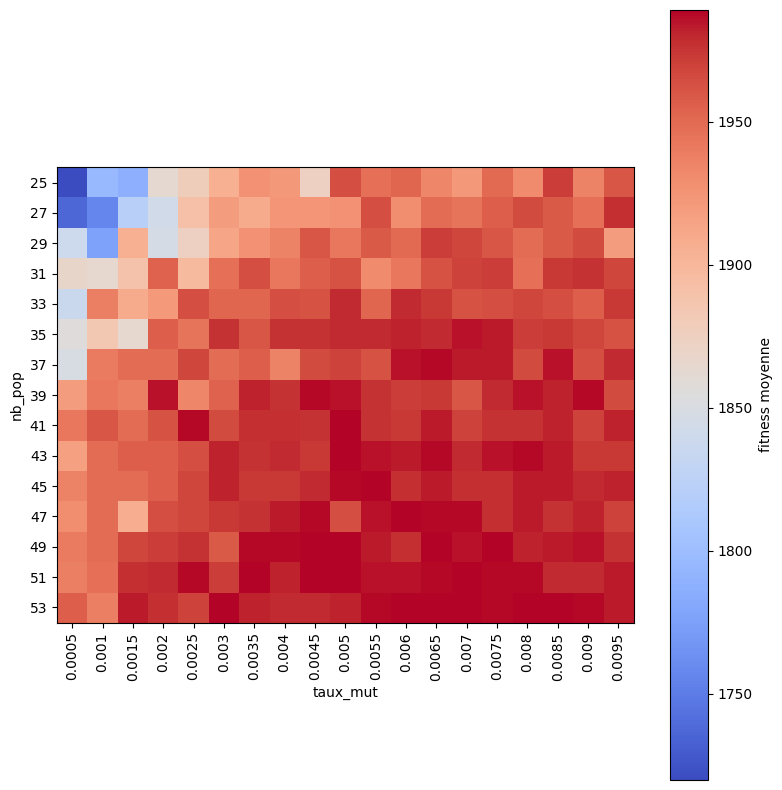

In [ ]:
nb_iter = 40
group_size = 20 #nombre de tests de chaque paramètres dans une éxecutions.

(variateur,_) = variateur_genetique.mutation_rate()
iterator1 = np.arange(0.0005,0.01,0.0005)
iterator1 = [round(x, 6) for x in iterator1]

title = ""
avg = []


iterator2 = np.arange(25,55,2)
for nb_pop in iterator2:
    test = Testor(Genetique_solver(sad2,nb_iter,nb_pop,0,1,"new_mutation"))
    testResult = test.test(iterator1,variateur,group_size)
    means = testResult[3]
    avg.append(means)

title1 = "taux_mut"
title2 = "nb_pop"

plot_full_colored_matrix(avg,iterator1,iterator2,title1,title2,print_fitness_values=False)

### 100-13-iter
Variation du nombre d'iteration sur classic et new_mutation en partant des parametre de population et de mutation determiné plus haut.

calcul: 100%|██████████| 40/40 [00:13<00:00,  2.90batch/s]


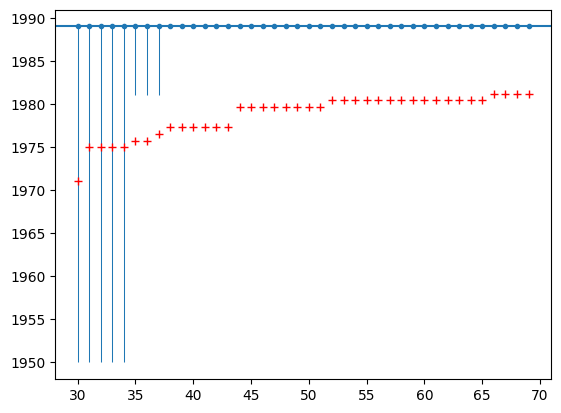

calcul: 100%|██████████| 40/40 [00:17<00:00,  2.32batch/s]


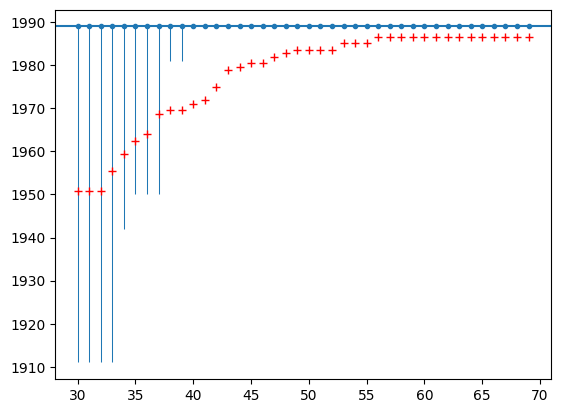

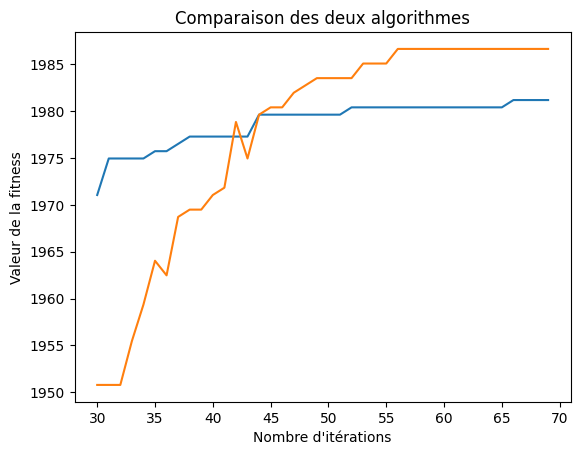

In [6]:
# pour classic

nb_iter = 0
nb_pop = 50
mutation_rate = 0.0025

group_size = 50 #nombre de tests de chaque paramètres dans une éxecutions.
(variateur,_) = variateur_genetique.nombre_iterations()
iterator1 = np.arange(30,70,1)
title = ""

test = Testor(Genetique_solver(sad2,nb_iter,nb_pop,mutation_rate,1,"classic"))
testResult = test.test(iterator1,variateur,group_size)

graph_test_result(testResult,sol_opti2,title)

avg_classic = testResult[3]

# Pour new_mutation

nb_iter = 0
nb_pop = 35
mutation_rate = 0.005

group_size = 50 #nombre de tests de chaque paramètres dans une éxecutions.

(variateur,_) = variateur_genetique.nombre_iterations()
iterator1 = np.arange(30,70,1)
title = ""

test = Testor(Genetique_solver(sad2,nb_iter,nb_pop,mutation_rate,1,"new_mutation"))
testResult = test.test(iterator1,variateur,group_size)

graph_test_result(testResult,sol_opti2,title)

avg_new_mutation = testResult[3]



# On compare les deux algorithmes
fig = plt.figure()
ax = fig.add_subplot()
ax.set_title("Comparaison des deux algorithmes")
ax.set_xlabel("Nombre d'itérations")
ax.set_ylabel("Valeur de la fitness")
ax.plot(iterator1,avg_classic,label="classic")
ax.plot(iterator1,avg_new_mutation,label="new_mutation")

plt.show()
